In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

sns.set(color_codes=True)


In [24]:
file_name = os.path.join("resources", "coin_tweet_analysis_combined.csv")
file = pd.read_csv(file_name)
coin_df = pd.DataFrame(file)
#set data type for numeric columns  
coin_df['date'] = pd.to_datetime(coin_df['date'])
coin_df['coin_price'] = coin_df['coin_price'].astype(float)
coin_df['price_change'] = coin_df['price_change'].astype(float)
coin_df['compound_average'] = coin_df['compound_average'].astype(float)
coin_df['positive_average'] = coin_df['positive_average'].astype(float)
coin_df['neutral_average'] = coin_df['neutral_average'].astype(float)
coin_df['negative_average'] = coin_df['negative_average'].astype(float)

coin_df.head()

,i,symbol,date,coin_name,coin_price,price_change,compound_average,positive_average,neutral_average,negative_average
0,1,ADA,2017-01-01,cardano,0.0,0.0,0.011396,0.01392,0.96672,0.01936
1,2,ADA,2017-01-02,cardano,0.0,0.0,-0.017168,0.04000,0.92552,0.03448
2,3,ADA,2017-01-03,cardano,0.0,0.0,-0.000296,0.02192,0.93316,0.04484
3,4,ADA,2017-01-04,cardano,0.0,0.0,0.010848,0.03092,0.88676,0.04224
4,5,ADA,2017-01-05,cardano,0.0,0.0,0.066924,0.03568,0.94524,0.01900


In [25]:
coin_list = ['BTC', 'ETH', 'XRP', 'BCH', 'ADA', 'LTC', 'XLM', 'NEO', 'EOS', 'XEM']
coin_color = ['green', 'yellow', 'greenyellow', 'green', 'lightskyblue', 
              'orange', 'lightcoral', 'plum', 'blue', 'slategrey']



C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


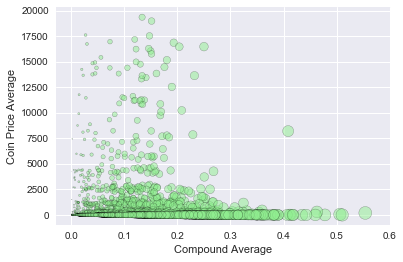

In [26]:
plt.scatter(coin_df['compound_average'], coin_df['coin_price'], edgecolor='black',
                    marker="o", color="lightgreen", alpha=0.5,
                    s=coin_df['compound_average']*300)
plt.xlabel('Compound Average')
plt.ylabel('Coin Price Average')
plt.show()


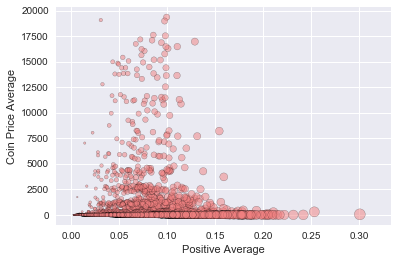

In [27]:
plt.scatter(coin_df['positive_average'], coin_df['coin_price'], edgecolor='black',
                    marker="o", color='lightcoral',alpha=0.5,
                    s=coin_df['positive_average']*400)
plt.xlabel('Positive Average')
plt.ylabel('Coin Price Average')
plt.show()


C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


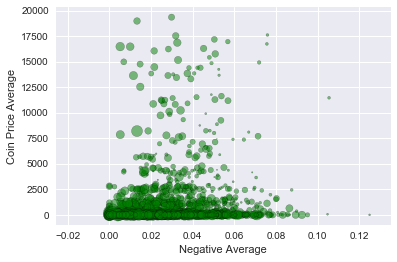

In [28]:
plt.scatter(coin_df['negative_average'], coin_df['coin_price'], edgecolor='black',
                    marker="o", color='green',alpha=0.5,
                    s=coin_df['compound_average']*300)
plt.xlabel('Negative Average')
plt.ylabel('Coin Price Average')
plt.show()


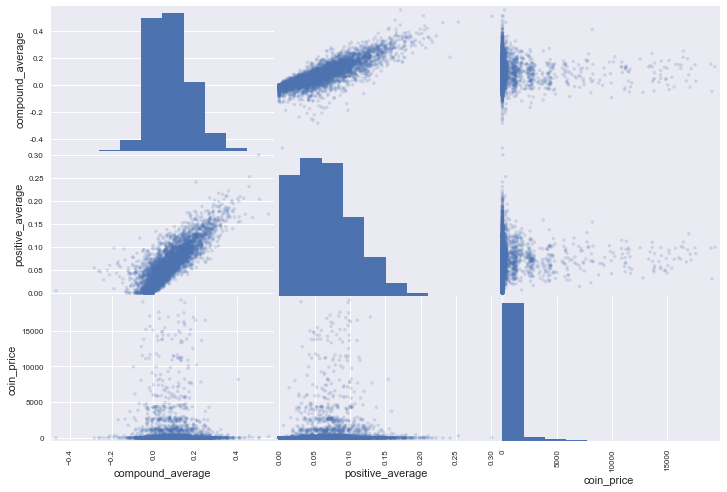

In [29]:
attributes = ['compound_average', 'positive_average','coin_price']
pd.plotting.scatter_matrix(coin_df[attributes], figsize=(12,8), alpha=0.2)
plt.show()

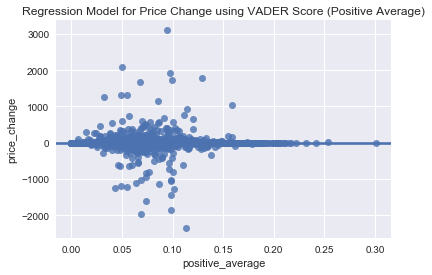

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04409
Date:                Fri, 09 Feb 2018   Prob (F-statistic):              0.834
Time:                        21:05:27   Log-Likelihood:                -25859.
No. Observations:                4037   AIC:                         5.172e+04
Df Residuals:                    4035   BIC:                         5.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.3653      4.264      0.320      0.749      -6.995       9.726
positive_average    11.5505     55.011      0.210      0.834     -96.300     119.402
==============================================================================
Omnibus:                     2701.818   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3038276.710
Skew:                           1.728   Prob(JB):                         0.00
Kurtosis:                     137.353   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#regression plot
sns.regplot(x='positive_average', y='price_change', data=coin_df, robust=True, ci=95)
plt.title("Regression Model for Price Change using VADER Score (Positive Average)")
plt.show()

#statistics
coin_df['intercept'] = 1
X = coin_df[['intercept', 'positive_average']]
y = coin_df['price_change']

smresults = sm.OLS(y, X).fit()

smresults.summary()

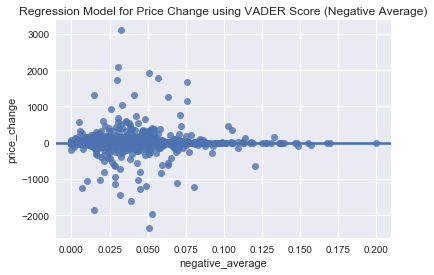

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3864
Date:                Fri, 09 Feb 2018   Prob (F-statistic):              0.534
Time:                        21:09:24   Log-Likelihood:                -25859.
No. Observations:                4037   AIC:                         5.172e+04
Df Residuals:                    4035   BIC:                         5.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.2308      3.813      0.061      0.952      -7.244       7.706
negative_average    68.4268    110.079      0.622      0.534    -147.389     284.243
==============================================================================
Omnibus:                     2691.539   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3038355.087
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                     137.355   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#regression plot
sns.regplot(x='negative_average', y='price_change', data=coin_df, robust=True, ci=95)
plt.title("Regression Model for Price Change using VADER Score (Negative Average)")
plt.show()

#statistics
coin_df['intercept'] = 1
X = coin_df[['intercept', 'negative_average']]
y = coin_df['price_change']

smresults = sm.OLS(y, X).fit()
smresults.summary()


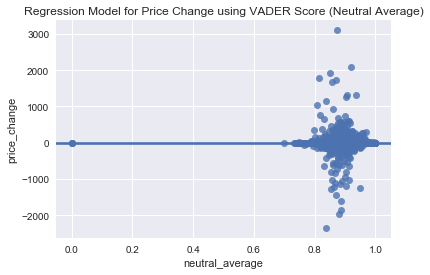

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1187
Date:                Fri, 09 Feb 2018   Prob (F-statistic):              0.730
Time:                        21:12:56   Log-Likelihood:                -25859.
No. Observations:                4037   AIC:                         5.172e+04
Df Residuals:                    4035   BIC:                         5.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          15.1268     37.821      0.400      0.689     -59.023      89.277
neutral_average   -14.3653     41.689     -0.345      0.730     -96.099      67.368
==============================================================================
Omnibus:                     2698.649   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3038117.452
Skew:                           1.724   Prob(JB):                         0.00
Kurtosis:                     137.349   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#regression plot
sns.regplot(x='neutral_average', y='price_change', data=coin_df, robust=True, ci=95)
plt.title("Regression Model for Price Change using VADER Score (Neutral Average)")
plt.show()

#statistics
coin_df['intercept'] = 1
X = coin_df[['intercept', 'neutral_average']]
y = coin_df['price_change']

smresults = sm.OLS(y, X).fit()

smresults.summary()

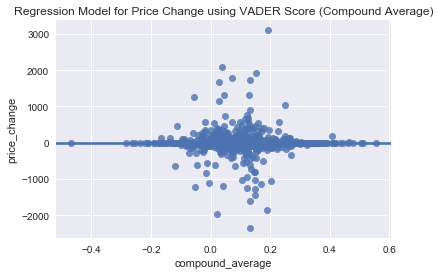

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05828
Date:                Fri, 09 Feb 2018   Prob (F-statistic):              0.809
Time:                        21:20:15   Log-Likelihood:                -25859.
No. Observations:                4037   AIC:                         5.172e+04
Df Residuals:                    4035   BIC:                         5.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            2.5999      3.048      0.853      0.394      -3.375       8.575
compound_average    -5.8116     24.074     -0.241      0.809     -53.010      41.386
==============================================================================
Omnibus:                     2706.759   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3039899.559
Skew:                           1.735   Prob(JB):                         0.00
Kurtosis:                     137.388   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#regression plot
sns.regplot(x='compound_average', y='price_change', data=coin_df, robust=True, ci=95)
plt.title("Regression Model for Price Change using VADER Score (Compound Average)")
plt.show()

#statistics
coin_df['intercept'] = 1
X = coin_df[['intercept', 'compound_average']]
y = coin_df['price_change']

smresults = sm.OLS(y, X).fit()

smresults.summary()